In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cons_raw = pd.read_csv("data/Electricity_Consumption_Monthly_Copy.csv")
cons_raw['date'] = pd.to_datetime(cons_raw['Date'], format='%m/%Y')
cons = cons_raw.loc[:, ['date', ' Total']].copy()
cons = cons.rename(columns={' Total':'total_cons'})
cons.set_index('date', inplace=True)

In [3]:
window_size = 30
cons['moving_avg'] = cons['total_cons'].rolling(window=window_size, min_periods=1).mean()
cons['norm_cons'] = cons['total_cons'] / cons['moving_avg']
cons = cons[cons.index.year >= 2003]

In [4]:
cons.to_csv('cons.csv')

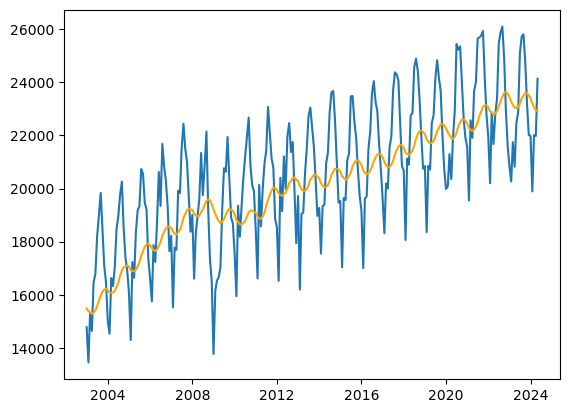

In [4]:
plt.plot(cons['total_cons'])
plt.plot(cons['moving_avg'], c='orange')
plt.show()

In [104]:
cp3 = pd.DataFrame()
cp3['month'] = cons.index.month.unique()
cp3.set_index('month', inplace=True)

In [105]:
total_cons_pairs = []
norm_cons_pairs = []
for mon in cp3.index:
    total_cons_month = cons.loc[cons.index.month == mon, 'total_cons']
    total_cons_pairs.append((min(total_cons_month), max(total_cons_month)))
    
    norm_cons_month = cons.loc[cons.index.month == mon, 'norm_cons']
    norm_cons_pairs.append((min(norm_cons_month), max(norm_cons_month))) 
    
cp3['tot_range'] = total_cons_pairs
cp3['norm_range'] = norm_cons_pairs

In [111]:
last_12 = cons.iloc[-12:, 1]

scale_vec = np.zeros(12)
for mon in cp3.index:
    val = cons.loc[cons.index.month==mon].iloc[0, 0]
    scale_vec[mon-1] = val

cp3['scaling_factor'] = scale_vec

In [114]:
cp3.to_csv('cp3.csv')